Index(['Unnamed: 0', 'team', 'year', 'avg_ht', 'avg_wt'], dtype='object')


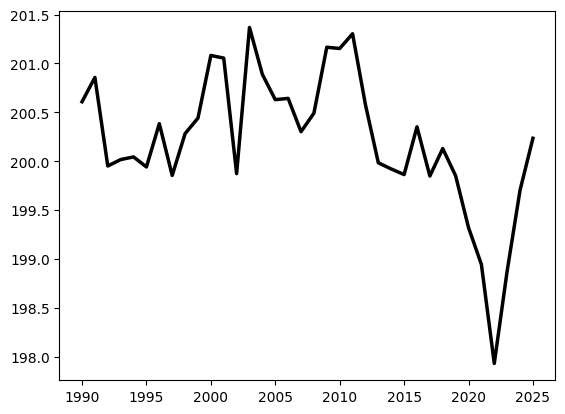

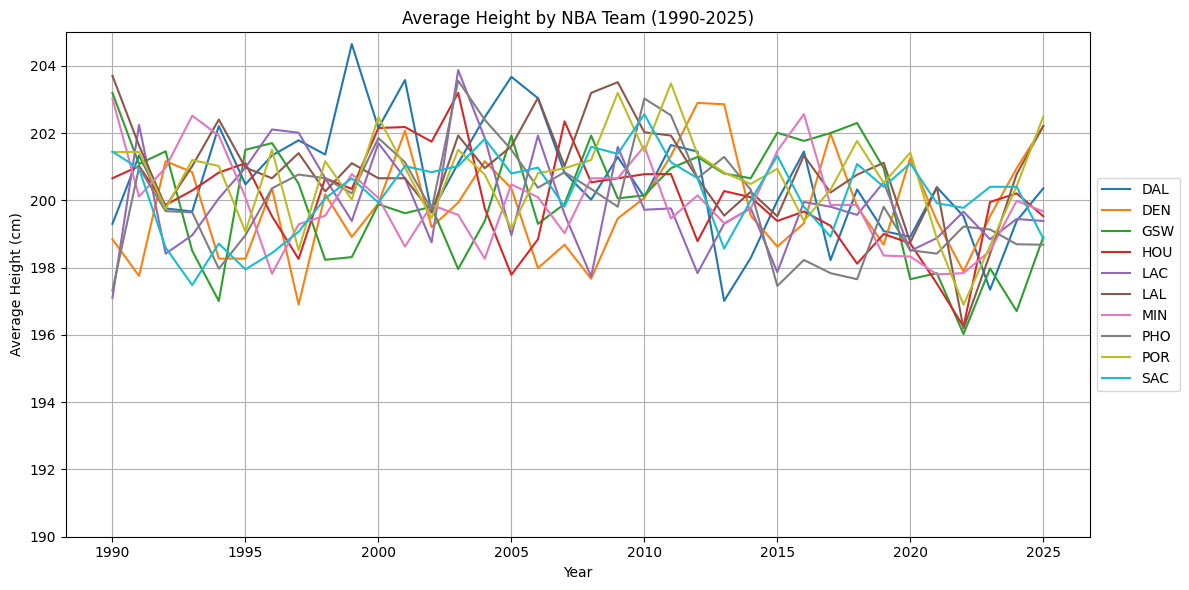

In [1]:
# NBA Average Height Trend Visualization (1990-2025)

import pandas as pd
import matplotlib.pyplot as plt

# 讀取資料
file_path = "nba_rosters_full_data.csv"
df = pd.read_csv(file_path)

# 確保有成功讀取 avg_ht, year, team 資料
print(df.columns)  # 確認有 'year', 'team', 'avg_ht'

# 組成統計資料
pivot_df = df.pivot(index="year", columns="team", values="avg_ht")
league_avg = df.groupby("year")["avg_ht"].mean()
plt.plot(league_avg.index, league_avg.values, color='black', linewidth=2.5, label='League Avg Height')

# 畫圖
plt.figure(figsize=(12, 6))
for team in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[team], label=team)

plt.title("Average Height by NBA Team (1990-2025)")
plt.xlabel("Year")
plt.ylabel("Average Height (cm)")
plt.ylim(190, 205)
plt.xticks(ticks=range(1990, 2030, 5))  # 每 5 年一線
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.tight_layout()
plt.show()


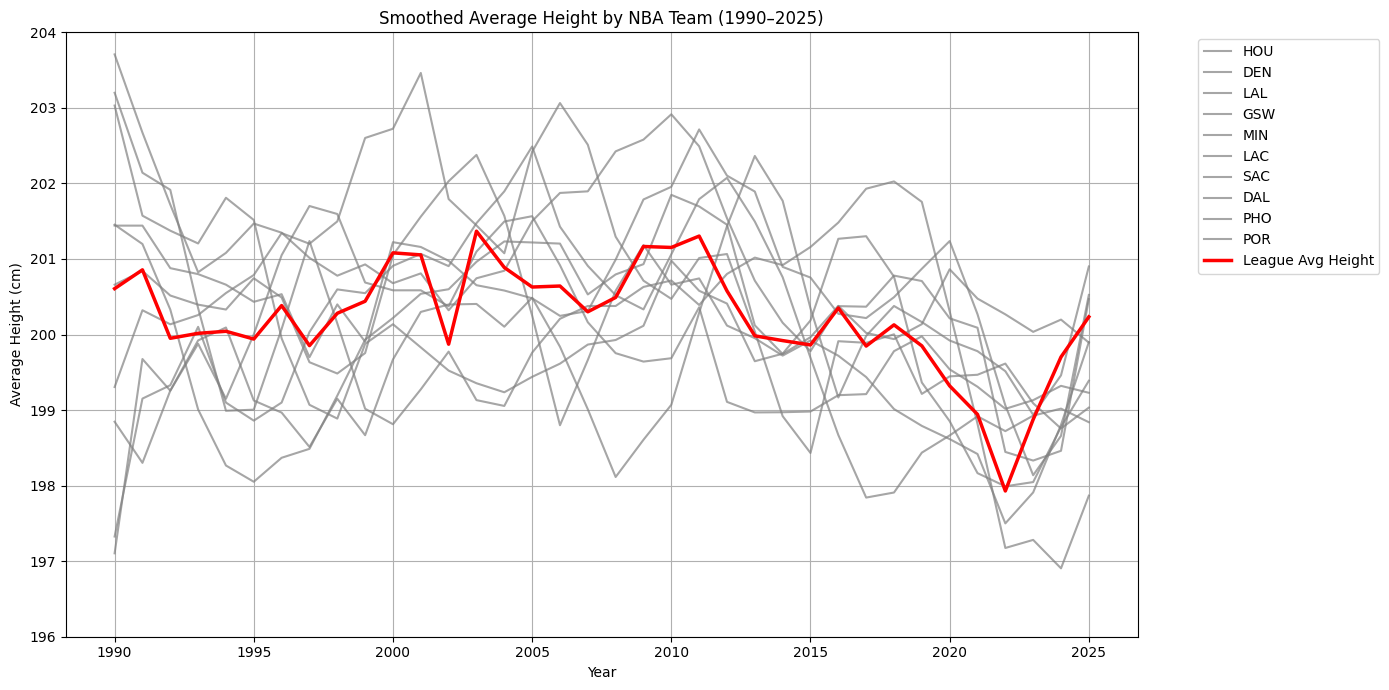

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# 讀取資料
file_path = "nba_rosters_full_data.csv"
df = pd.read_csv(file_path)

# 確保資料型別正確
df["year"] = pd.to_numeric(df["year"], errors="coerce")
df["avg_ht"] = pd.to_numeric(df["avg_ht"], errors="coerce")

# 移除缺失值
df.dropna(subset=["year", "avg_ht"], inplace=True)

# 計算 3 年滑動平均
df["avg_ht_smooth"] = df.groupby("team")["avg_ht"].transform(lambda x: x.rolling(3, min_periods=1).mean())

# 畫圖
plt.figure(figsize=(14, 7))
teams = df["team"].unique()

for team in teams:
    team_data = df[df["team"] == team]
    plt.plot(team_data["year"], team_data["avg_ht_smooth"], label=team, alpha=0.7, color='grey')

# 加入聯盟平均線（使用原始平均值）
league_avg = df.groupby("year")["avg_ht"].mean()
plt.plot(league_avg.index, league_avg.values, color="red", linewidth=2.5, label="League Avg Height")

plt.title("Smoothed Average Height by NBA Team (1990–2025)")
plt.xlabel("Year")
plt.ylabel("Average Height (cm)")
plt.ylim(196, 204)
plt.xticks(ticks=range(1990, 2030, 5))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


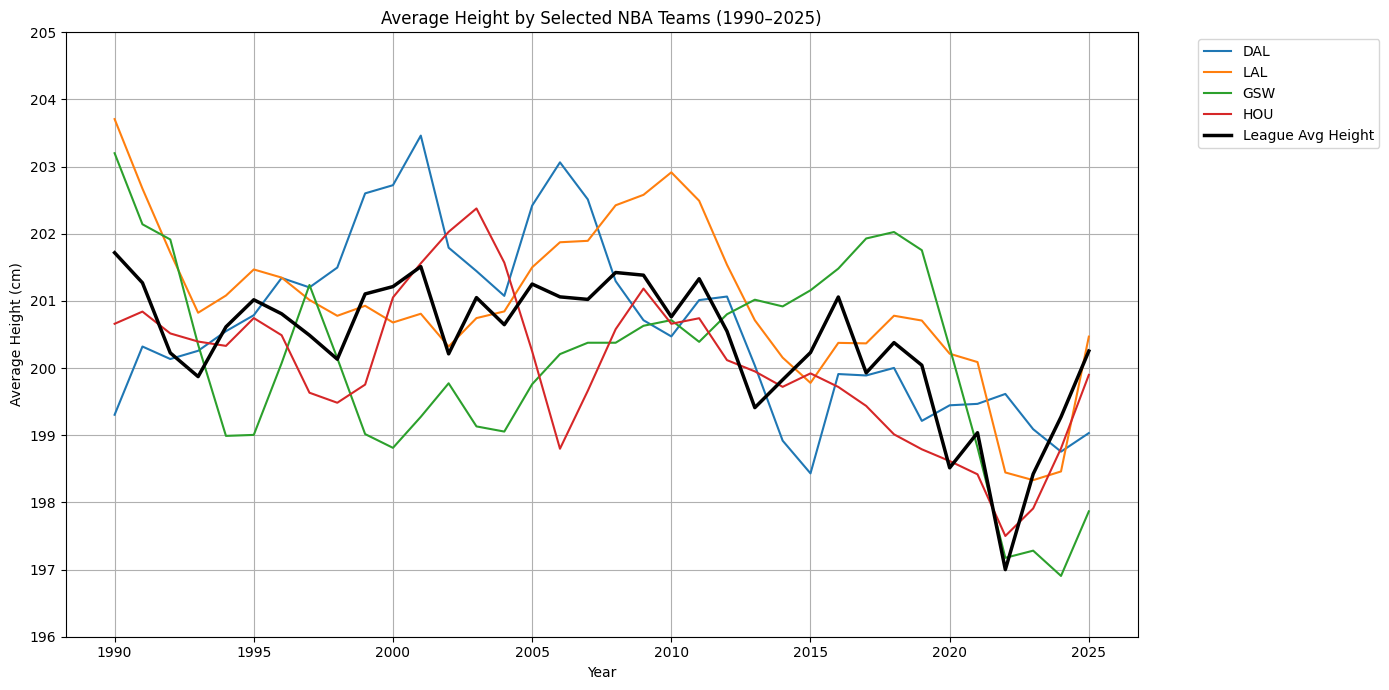

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# 讀取資料
file_path = "nba_rosters_full_data.csv"
df = pd.read_csv(file_path)

# 確保資料型別正確
df["year"] = pd.to_numeric(df["year"], errors="coerce")
df["avg_ht"] = pd.to_numeric(df["avg_ht"], errors="coerce")

# 移除缺失值
df.dropna(subset=["year", "avg_ht"], inplace=True)

# 篩選特定球隊
selected_teams = ["DAL", "LAL", "GSW", "HOU"]
df = df[df["team"].isin(selected_teams)]

# 計算 3 年滑動平均
df["avg_ht_smooth"] = df.groupby("team")["avg_ht"].transform(lambda x: x.rolling(3, min_periods=1).mean())

# 計算聯盟平均身高（只針對選定的球隊）
league_avg = df.groupby("year")["avg_ht"].mean()

# 畫圖
plt.figure(figsize=(14, 7))

for team in selected_teams:
    team_data = df[df["team"] == team]
    plt.plot(team_data["year"], team_data["avg_ht_smooth"], label=team)

plt.plot(league_avg.index, league_avg.values, color="black", linewidth=2.5, label="League Avg Height")

plt.title("Average Height by Selected NBA Teams (1990–2025)")
plt.xlabel("Year")
plt.ylabel("Average Height (cm)")
plt.ylim(196, 205)
plt.xticks(ticks=range(1990, 2030, 5))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [5]:
# --- 回歸線 ---
from sklearn.linear_model import LinearRegression
import numpy as np

X = league_avg.index.values.reshape(-1, 1)
y = league_avg.values
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)


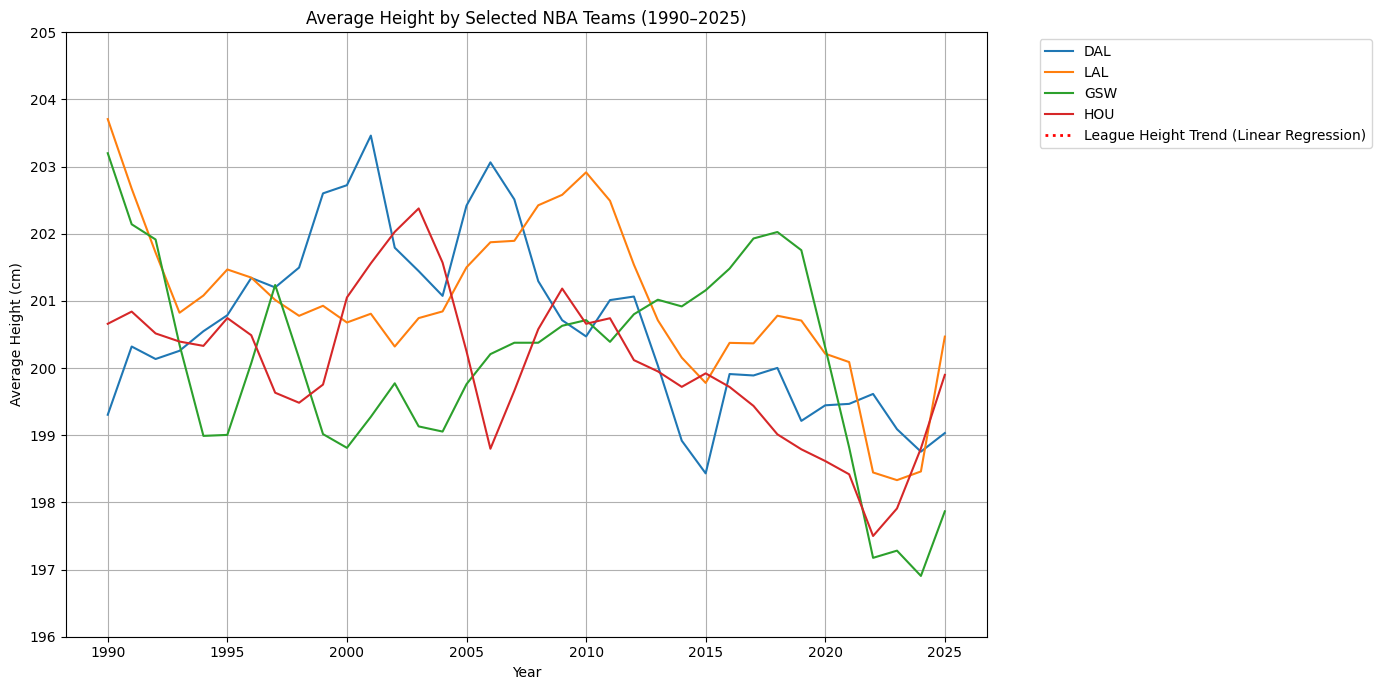

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# 讀取資料
file_path = "nba_rosters_full_data.csv"
df = pd.read_csv(file_path)

# 確保資料型別正確
df["year"] = pd.to_numeric(df["year"], errors="coerce")
df["avg_ht"] = pd.to_numeric(df["avg_ht"], errors="coerce")

# 移除缺失值
df.dropna(subset=["year", "avg_ht"], inplace=True)

# 篩選特定球隊
selected_teams = ["DAL", "LAL", "GSW", "HOU"]
df = df[df["team"].isin(selected_teams)]

# 計算 3 年滑動平均
df["avg_ht_smooth"] = df.groupby("team")["avg_ht"].transform(lambda x: x.rolling(3, min_periods=1).mean())

# 計算聯盟平均身高（只針對選定的球隊）
league_avg = df.groupby("year")["avg_ht"].mean()

# 畫圖
plt.figure(figsize=(14, 7))


colors = {"DAL": "#1f77b4", "LAL": "#ff7f0e", "GSW": "#2ca02c", "HOU": "#d62728"}
linestyles = {"DAL": "-", "LAL": "-", "GSW": "-", "HOU": "-"}

for team in selected_teams:
    team_data = df[df["team"] == team]
    plt.plot(team_data["year"], team_data["avg_ht_smooth"], label=team, color=colors[team], linestyle=linestyles[team])

#plt.plot(league_avg.index, league_avg.values, color="black", linewidth=2.5, label="League Avg Height", linestyle="--")
plt.plot(league_avg.index, y_pred, color="red", linewidth=2, linestyle=":", label="League Height Trend (Linear Regression)")

plt.title("Average Height by Selected NBA Teams (1990–2025)")
plt.xlabel("Year")
plt.ylabel("Average Height (cm)")
plt.ylim(196, 205
        )
plt.xticks(ticks=range(1990, 2030, 5))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [7]:
from sklearn.linear_model import LinearRegression
import numpy as np

# 準備聯盟平均身高的回歸資料
X = league_avg.index.values.reshape(-1, 1)  # 年份
y = league_avg.values  # 身高

# 建立線性回歸模型並擬合
model = LinearRegression()
model.fit(X, y)

# 預測身高趨勢
y_pred = model.predict(X)


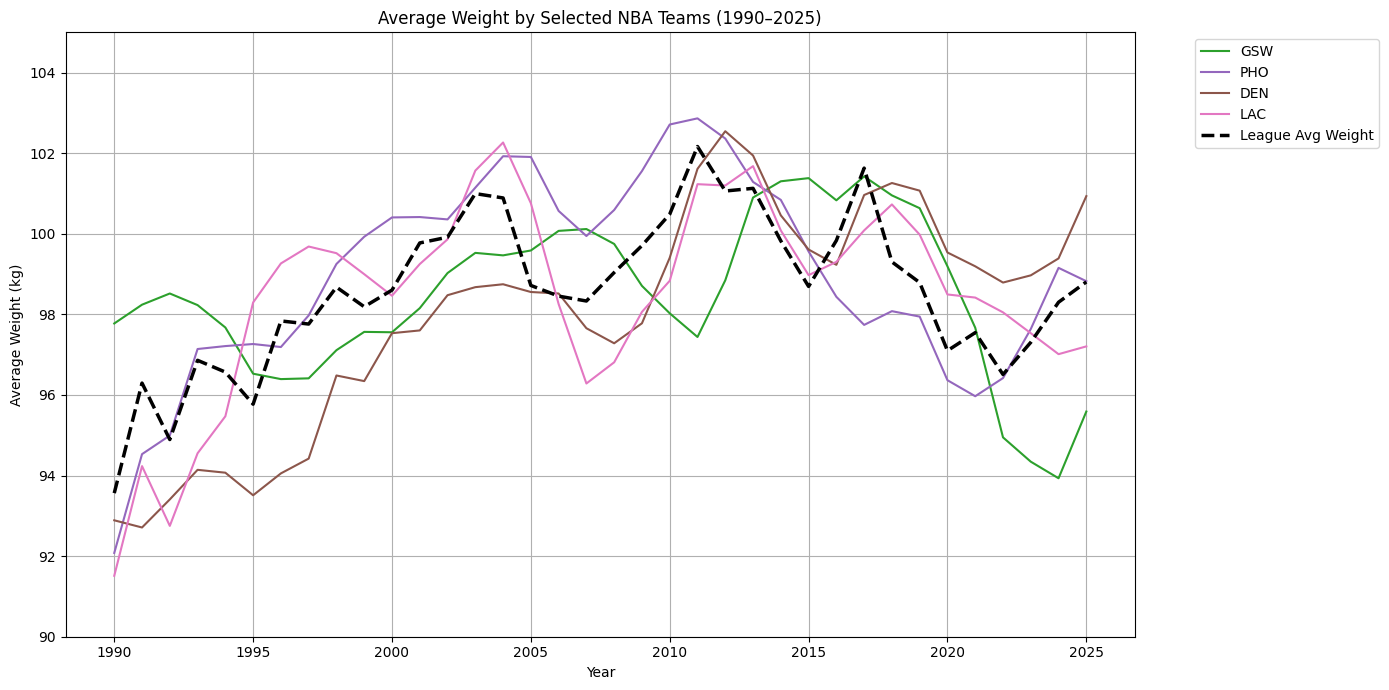

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# 讀取資料
file_path = "nba_rosters_full_data.csv"
df = pd.read_csv(file_path)

# 確保資料型別正確
df["year"] = pd.to_numeric(df["year"], errors="coerce")
df["avg_wt"] = pd.to_numeric(df["avg_wt"], errors="coerce")

# 移除缺失值
df.dropna(subset=["year", "avg_wt"], inplace=True)

# 篩選特定球隊
selected_teams = ["GSW", "PHO", "DEN", "LAC"]
df = df[df["team"].isin(selected_teams)]

# 計算 3 年滑動平均
df["avg_wt_smooth"] = df.groupby("team")["avg_wt"].transform(lambda x: x.rolling(3, min_periods=1).mean())

# 計算聯盟平均體重（只針對選定的球隊）
league_avg = df.groupby("year")["avg_wt"].mean()

# 畫圖
plt.figure(figsize=(14, 7))

colors = {"GSW": "#2ca02c", "PHO": "#9467bd", "DEN": "#8c564b", "LAC": "#e377c2"}
linestyles = {"GSW": "-", "PHO": "-", "DEN": "-", "LAC": "-"}

for team in selected_teams:
    team_data = df[df["team"] == team]
    plt.plot(team_data["year"], team_data["avg_wt_smooth"], label=team, color=colors[team], linestyle=linestyles[team])

plt.plot(league_avg.index, league_avg.values, color="black", linewidth=2.5, label="League Avg Weight", linestyle="--")

plt.title("Average Weight by Selected NBA Teams (1990–2025)")
plt.xlabel("Year")
plt.ylabel("Average Weight (kg)")
plt.ylim(90, 105)
plt.xticks(ticks=range(1990, 2030, 5))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


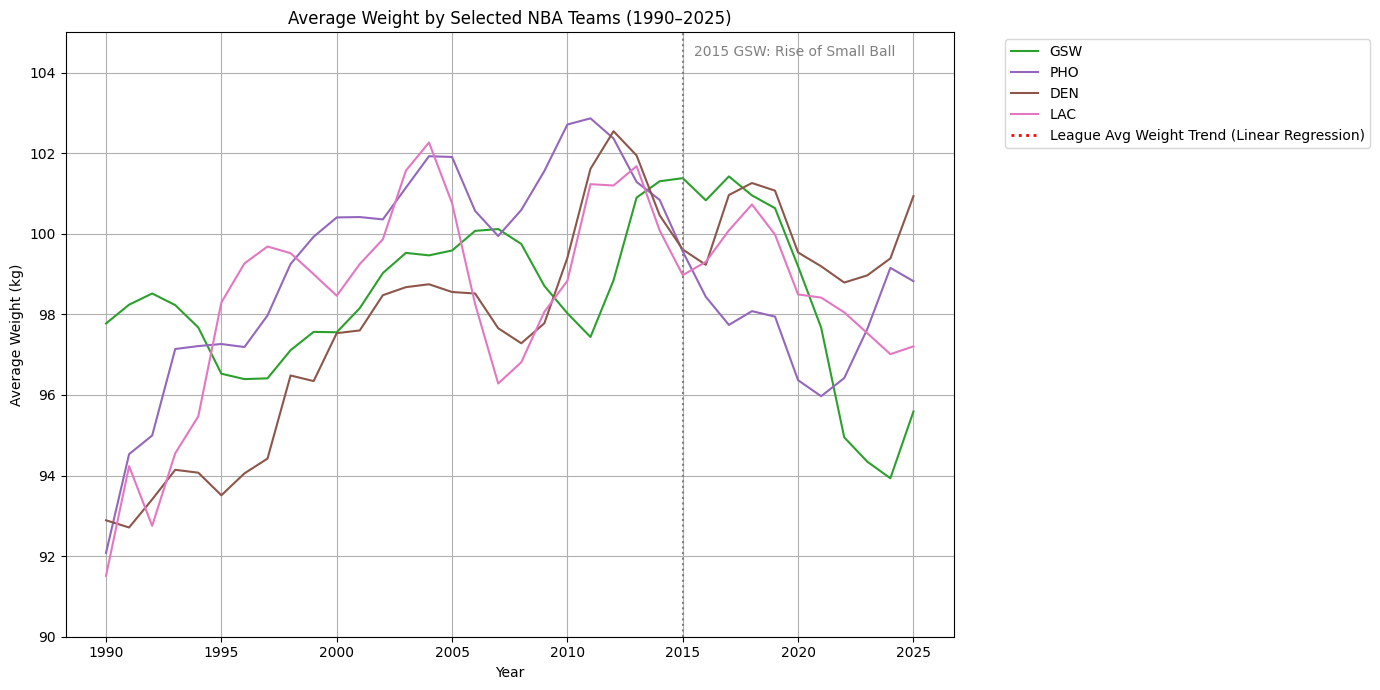

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# 讀取資料
file_path = "nba_rosters_full_data.csv"
df = pd.read_csv(file_path)

# 確保資料型別正確
df["year"] = pd.to_numeric(df["year"], errors="coerce")
df["avg_wt"] = pd.to_numeric(df["avg_wt"], errors="coerce")

# 移除缺失值
df.dropna(subset=["year", "avg_wt"], inplace=True)

# 篩選特定球隊
selected_teams = ["GSW", "PHO", "DEN", "LAC"]
df = df[df["team"].isin(selected_teams)]

# 計算 3 年滑動平均
df["avg_wt_smooth"] = df.groupby("team")["avg_wt"].transform(lambda x: x.rolling(3, min_periods=1).mean())

# 計算聯盟平均體重（只針對選定的球隊）
league_avg = df.groupby("year")["avg_wt"].mean()

# 畫圖
plt.figure(figsize=(14, 7))

colors = {"GSW": "#2ca02c", "PHO": "#9467bd", "DEN": "#8c564b", "LAC": "#e377c2"}
linestyles = {"GSW": "-", "PHO": "-", "DEN": "-", "LAC": "-"}

for team in selected_teams:
    team_data = df[df["team"] == team]
    plt.plot(team_data["year"], team_data["avg_wt_smooth"], label=team, color=colors[team], linestyle=linestyles[team])

#plt.plot(league_avg.index, league_avg.values, color="black", linewidth=2.5, label="League Avg Weight", linestyle="--")
plt.plot(league_avg.index, y_pred, color="red", linewidth=2, linestyle=":", label="League Avg Weight Trend (Linear Regression)")


# 加上標註：2015 小球時代崛起（勇士奪冠）
plt.axvline(x=2015, color="gray", linestyle=":", linewidth=1.5)
plt.text(2015.5, 104.5, "2015 GSW: Rise of Small Ball", rotation=0, verticalalignment='center', color="gray")

plt.title("Average Weight by Selected NBA Teams (1990–2025)")
plt.xlabel("Year")
plt.ylabel("Average Weight (kg)")
plt.ylim(90, 105)
plt.xticks(ticks=range(1990, 2030, 5))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:
# 加入線性回歸線用於聯盟平均體重
from sklearn.linear_model import LinearRegression
import numpy as np

# 準備回歸資料
X = league_avg.index.values.reshape(-1, 1)  # 年份 (2D array)
y = league_avg.values  # 體重

# 建立並訓練模型
model = LinearRegression()
model.fit(X, y)

# 產生預測值
y_pred = model.predict(X)


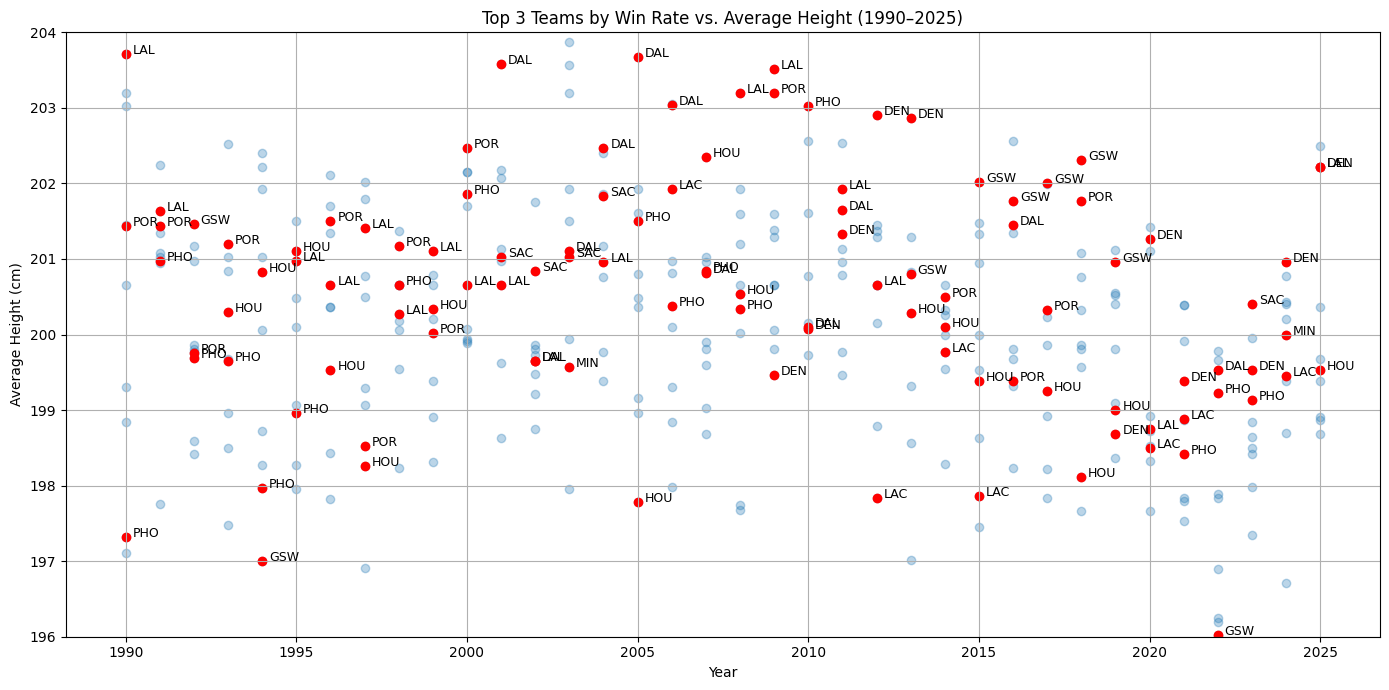

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# 讀取資料
roster_path = "nba_rosters_full_data.csv"
winrate_path = "nba_winrates_normalized.csv"

df_roster = pd.read_csv(roster_path)
df_win = pd.read_csv(winrate_path)

# 轉換資料型別
df_roster["year"] = pd.to_numeric(df_roster["year"], errors="coerce")
df_roster["avg_ht"] = pd.to_numeric(df_roster["avg_ht"], errors="coerce")
df_win["year"] = pd.to_numeric(df_win["year"], errors="coerce")
df_win["normalized_win_rate"] = pd.to_numeric(df_win["normalized_win_rate"], errors="coerce")

# 合併資料
df = pd.merge(df_roster, df_win, on=["team", "year"])

# 篩選出勝率前三名每年
top3_df = df.sort_values(by=["year", "normalized_win_rate"], ascending=[True, False])
top3_df = top3_df.groupby("year").head(3)

# 畫圖
plt.figure(figsize=(14, 7))

# 散佈圖：所有球隊
plt.scatter(df["year"], df["avg_ht"], alpha=0.3, label="All Teams")

# 標註勝率前三名球隊
for _, row in top3_df.iterrows():
    plt.scatter(row["year"], row["avg_ht"], color="red")
    plt.text(row["year"] + 0.2, row["avg_ht"], row["team"], fontsize=9)

plt.title("Top 3 Teams by Win Rate vs. Average Height (1990–2025)")
plt.xlabel("Year")
plt.ylabel("Average Height (cm)")
plt.ylim(196, 204)
plt.xticks(ticks=range(1990, 2030, 5))
plt.grid(True)
plt.tight_layout()
plt.show()


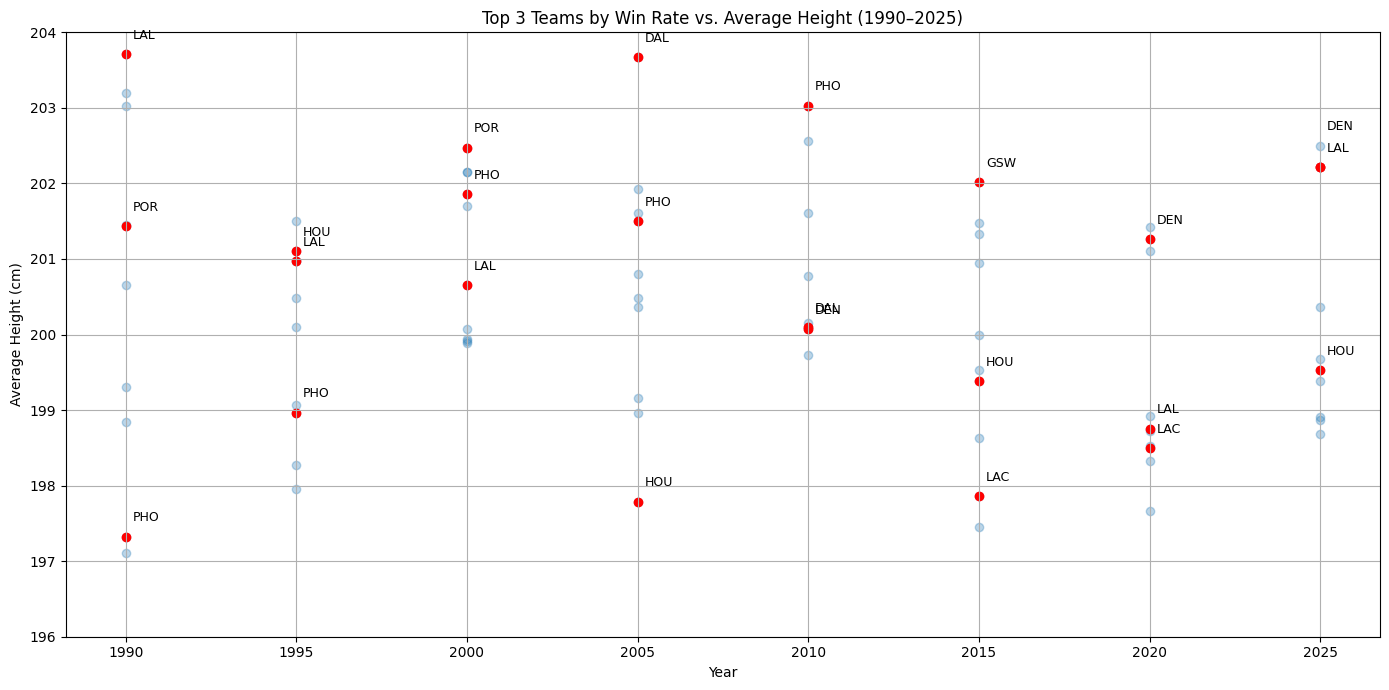

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# 讀取資料
roster_path = "nba_rosters_full_data.csv"
winrate_path = "nba_winrates_normalized.csv"

df_roster = pd.read_csv(roster_path)
df_win = pd.read_csv(winrate_path)

# 轉換資料型別
df_roster["year"] = pd.to_numeric(df_roster["year"], errors="coerce")
df_roster["avg_ht"] = pd.to_numeric(df_roster["avg_ht"], errors="coerce")
df_win["year"] = pd.to_numeric(df_win["year"], errors="coerce")
df_win["normalized_win_rate"] = pd.to_numeric(df_win["normalized_win_rate"], errors="coerce")

# 合併資料
df = pd.merge(df_roster, df_win, on=["team", "year"])

# 僅保留特定年份
selected_years = [1990, 1995, 2000, 2005, 2010, 2015, 2020, 2025]
df = df[df["year"].isin(selected_years)]

# 篩選出勝率前三名每年
top3_df = df.sort_values(by=["year", "normalized_win_rate"], ascending=[True, False])
top3_df = top3_df.groupby("year").head(3)

# 畫圖
plt.figure(figsize=(14, 7))

# 散佈圖：所有球隊
plt.scatter(df["year"], df["avg_ht"], alpha=0.3, label="All Teams")

# 標註勝率前三名球隊（避免重疊使用位移）
offset_map = {}
for _, row in top3_df.iterrows():
    coord = (row["year"], row["avg_ht"])
    if coord in offset_map:
        offset_map[coord] += 0.3
    else:
        offset_map[coord] = 0.2
    plt.scatter(row["year"], row["avg_ht"], color="red")
    plt.text(row["year"] + 0.2, row["avg_ht"] + offset_map[coord], row["team"], fontsize=9)

plt.title("Top 3 Teams by Win Rate vs. Average Height (1990–2025)")
plt.xlabel("Year")
plt.ylabel("Average Height (cm)")
plt.ylim(196, 204)
plt.xticks(ticks=selected_years)
plt.grid(True)
plt.tight_layout()
plt.show()


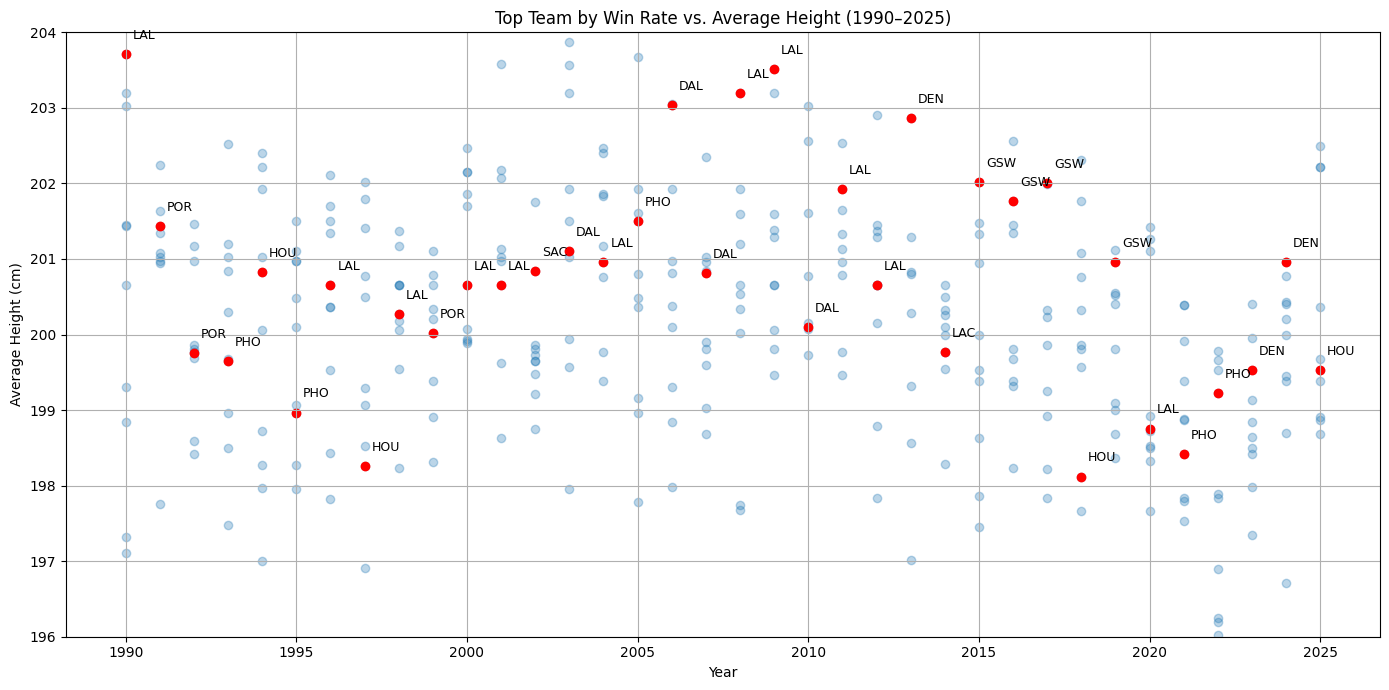

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# 讀取資料
roster_path = "nba_rosters_full_data.csv"
winrate_path = "nba_winrates_normalized.csv"

df_roster = pd.read_csv(roster_path)
df_win = pd.read_csv(winrate_path)

# 轉換資料型別
df_roster["year"] = pd.to_numeric(df_roster["year"], errors="coerce")
df_roster["avg_ht"] = pd.to_numeric(df_roster["avg_ht"], errors="coerce")
df_win["year"] = pd.to_numeric(df_win["year"], errors="coerce")
df_win["normalized_win_rate"] = pd.to_numeric(df_win["normalized_win_rate"], errors="coerce")

# 合併資料
df = pd.merge(df_roster, df_win, on=["team", "year"])

# 篩選出每年勝率最高的球隊
top1_df = df.sort_values(by=["year", "normalized_win_rate"], ascending=[True, False])
top1_df = top1_df.groupby("year").head(1)

# 畫圖
plt.figure(figsize=(14, 7))

# 散佈圖：所有球隊
plt.scatter(df["year"], df["avg_ht"], alpha=0.3, label="All Teams")

# 標註勝率最高球隊（避免重疊使用位移）
offset_map = {}
for _, row in top1_df.iterrows():
    coord = (row["year"], row["avg_ht"])
    if coord in offset_map:
        offset_map[coord] += 0.3
    else:
        offset_map[coord] = 0.2
    plt.scatter(row["year"], row["avg_ht"], color="red")
    plt.text(row["year"] + 0.2, row["avg_ht"] + offset_map[coord], row["team"], fontsize=9)
    
plt.title("Top Team by Win Rate vs. Average Height (1990–2025)")
plt.xlabel("Year")
plt.ylabel("Average Height (cm)")
plt.ylim(196, 204)
plt.xticks(ticks=range(1990, 2030, 5))
plt.grid(True)
plt.tight_layout()
plt.show()


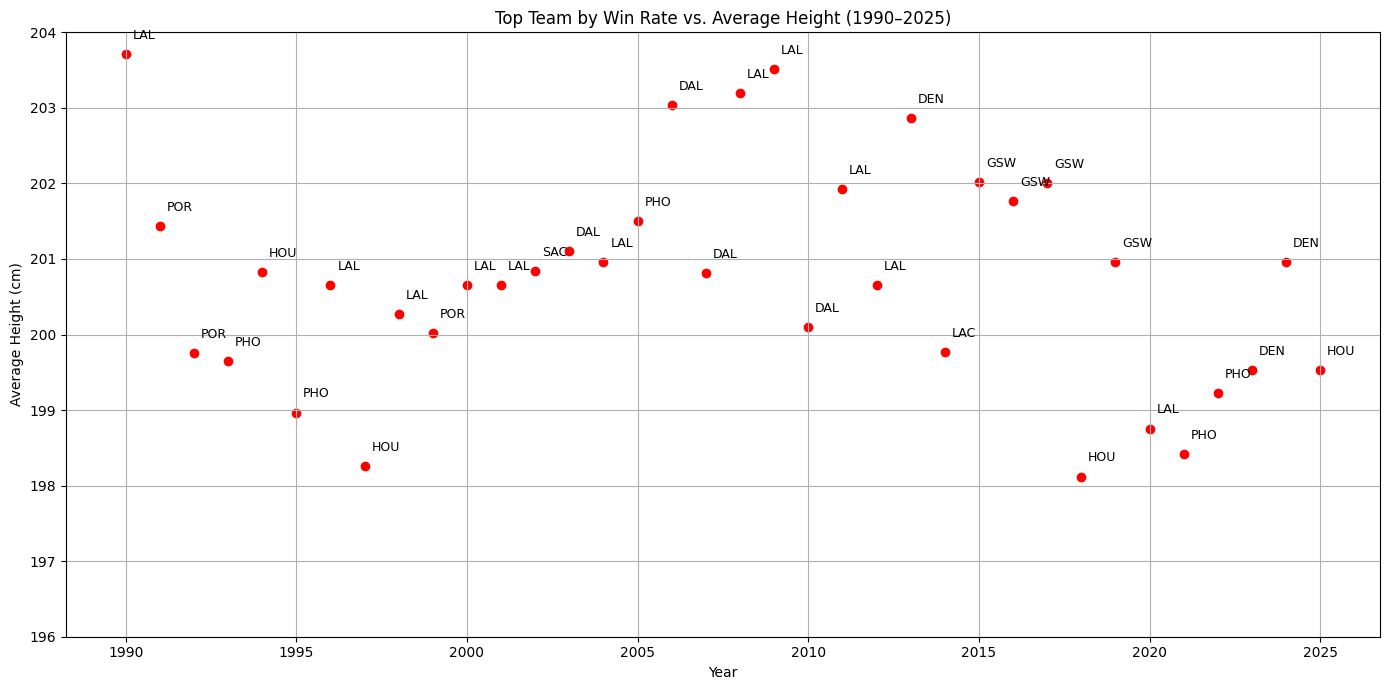

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# 讀取資料
roster_path = "nba_rosters_full_data.csv"
winrate_path = "nba_winrates_normalized.csv"

df_roster = pd.read_csv(roster_path)
df_win = pd.read_csv(winrate_path)

# 轉換資料型別
df_roster["year"] = pd.to_numeric(df_roster["year"], errors="coerce")
df_roster["avg_ht"] = pd.to_numeric(df_roster["avg_ht"], errors="coerce")
df_win["year"] = pd.to_numeric(df_win["year"], errors="coerce")
df_win["normalized_win_rate"] = pd.to_numeric(df_win["normalized_win_rate"], errors="coerce")

# 合併資料
df = pd.merge(df_roster, df_win, on=["team", "year"])

# 篩選出每年勝率最高的球隊
top1_df = df.sort_values(by=["year", "normalized_win_rate"], ascending=[True, False])
top1_df = top1_df.groupby("year").head(1)

# 畫圖
plt.figure(figsize=(14, 7))

# 只繪製勝率最高的球隊
offset_map = {}
for _, row in top1_df.iterrows():
    coord = (row["year"], row["avg_ht"])
    if coord in offset_map:
        offset_map[coord] += 0.3
    else:
        offset_map[coord] = 0.2
    plt.scatter(row["year"], row["avg_ht"], color="red")
    plt.text(row["year"] + 0.2, row["avg_ht"] + offset_map[coord], row["team"], fontsize=9)

plt.title("Top Team by Win Rate vs. Average Height (1990–2025)")
plt.xlabel("Year")
plt.ylabel("Average Height (cm)")
plt.ylim(196, 204)
plt.xticks(ticks=range(1990, 2030, 5))
plt.grid(True)
plt.tight_layout()
plt.show()


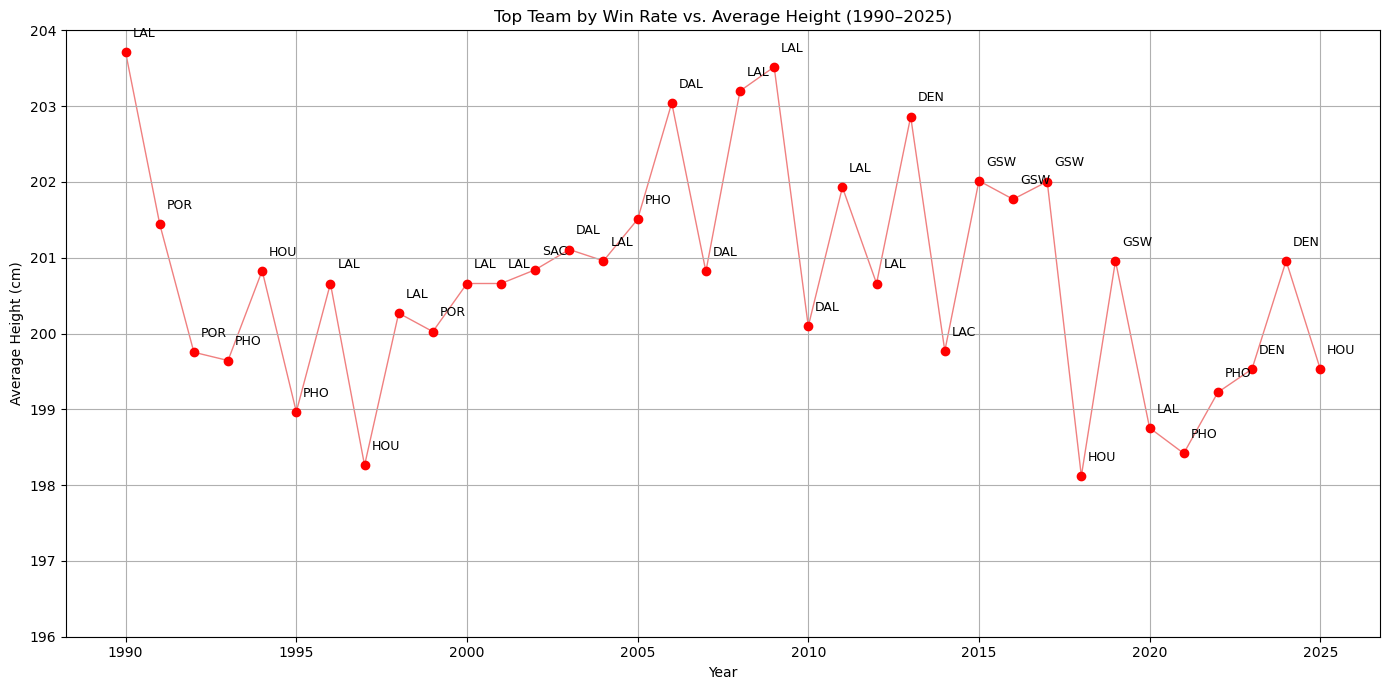

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# 讀取資料
roster_path = "nba_rosters_full_data.csv"
winrate_path = "nba_winrates_normalized.csv"

df_roster = pd.read_csv(roster_path)
df_win = pd.read_csv(winrate_path)

# 轉換資料型別
df_roster["year"] = pd.to_numeric(df_roster["year"], errors="coerce")
df_roster["avg_ht"] = pd.to_numeric(df_roster["avg_ht"], errors="coerce")
df_win["year"] = pd.to_numeric(df_win["year"], errors="coerce")
df_win["normalized_win_rate"] = pd.to_numeric(df_win["normalized_win_rate"], errors="coerce")

# 合併資料
df = pd.merge(df_roster, df_win, on=["team", "year"])

# 篩選出每年勝率最高的球隊
top1_df = df.sort_values(by=["year", "normalized_win_rate"], ascending=[True, False])
top1_df = top1_df.groupby("year").head(1).sort_values("year")

# 畫圖
plt.figure(figsize=(14, 7))

# 繪製細紅線連接點
plt.plot(top1_df["year"], top1_df["avg_ht"], color="lightcoral", linewidth=1, linestyle="-", zorder=1)

# 繪製勝率最高球隊的點與標註
offset_map = {}
for _, row in top1_df.iterrows():
    coord = (row["year"], row["avg_ht"])
    if coord in offset_map:
        offset_map[coord] += 0.3
    else:
        offset_map[coord] = 0.2
    plt.scatter(row["year"], row["avg_ht"], color="red", zorder=2)
    plt.text(row["year"] + 0.2, row["avg_ht"] + offset_map[coord], row["team"], fontsize=9)

plt.title("Top Team by Win Rate vs. Average Height (1990–2025)")
plt.xlabel("Year")
plt.ylabel("Average Height (cm)")
plt.ylim(196, 204)
plt.xticks(ticks=range(1990, 2030, 5))
plt.grid(True)
plt.tight_layout()
plt.show()


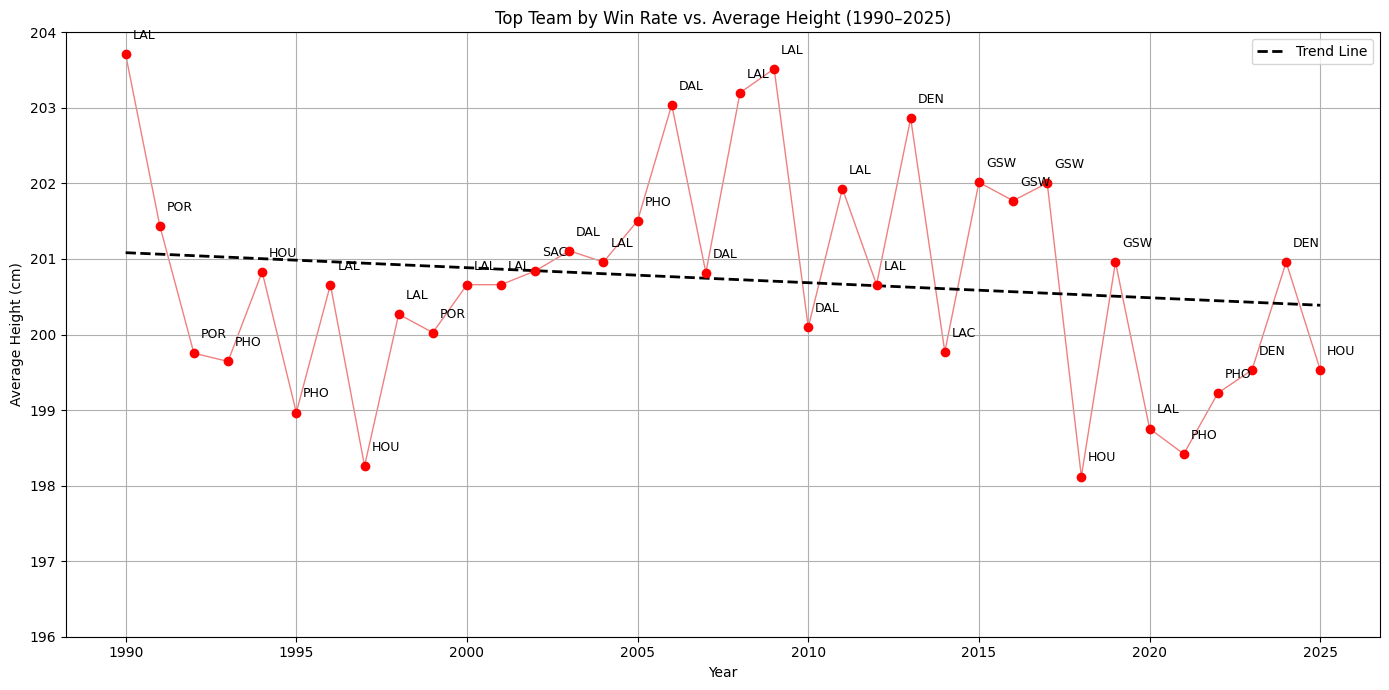

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 讀取資料
roster_path = "nba_rosters_full_data.csv"
winrate_path = "nba_winrates_normalized.csv"

df_roster = pd.read_csv(roster_path)
df_win = pd.read_csv(winrate_path)

# 轉換資料型別
df_roster["year"] = pd.to_numeric(df_roster["year"], errors="coerce")
df_roster["avg_ht"] = pd.to_numeric(df_roster["avg_ht"], errors="coerce")
df_win["year"] = pd.to_numeric(df_win["year"], errors="coerce")
df_win["normalized_win_rate"] = pd.to_numeric(df_win["normalized_win_rate"], errors="coerce")

# 合併資料
df = pd.merge(df_roster, df_win, on=["team", "year"])

# 篩選出每年勝率最高的球隊
top1_df = df.sort_values(by=["year", "normalized_win_rate"], ascending=[True, False])
top1_df = top1_df.groupby("year").head(1).sort_values("year")

# 畫圖
plt.figure(figsize=(14, 7))

# 繪製細紅線連接點
plt.plot(top1_df["year"], top1_df["avg_ht"], color="lightcoral", linewidth=1, linestyle="-", zorder=1)

# 加入回歸線
if len(top1_df) > 1:
    z = np.polyfit(top1_df["year"], top1_df["avg_ht"], 1)
    p = np.poly1d(z)
    plt.plot(top1_df["year"], p(top1_df["year"]), color="black", linestyle="--", linewidth=2, label="Trend Line")

# 繪製勝率最高球隊的點與標註
offset_map = {}
for _, row in top1_df.iterrows():
    coord = (row["year"], row["avg_ht"])
    if coord in offset_map:
        offset_map[coord] += 0.3
    else:
        offset_map[coord] = 0.2
    plt.scatter(row["year"], row["avg_ht"], color="red", zorder=2)
    plt.text(row["year"] + 0.2, row["avg_ht"] + offset_map[coord], row["team"], fontsize=9)

plt.title("Top Team by Win Rate vs. Average Height (1990–2025)")
plt.xlabel("Year")
plt.ylabel("Average Height (cm)")
plt.ylim(196, 204)
plt.xticks(ticks=range(1990, 2030, 5))
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


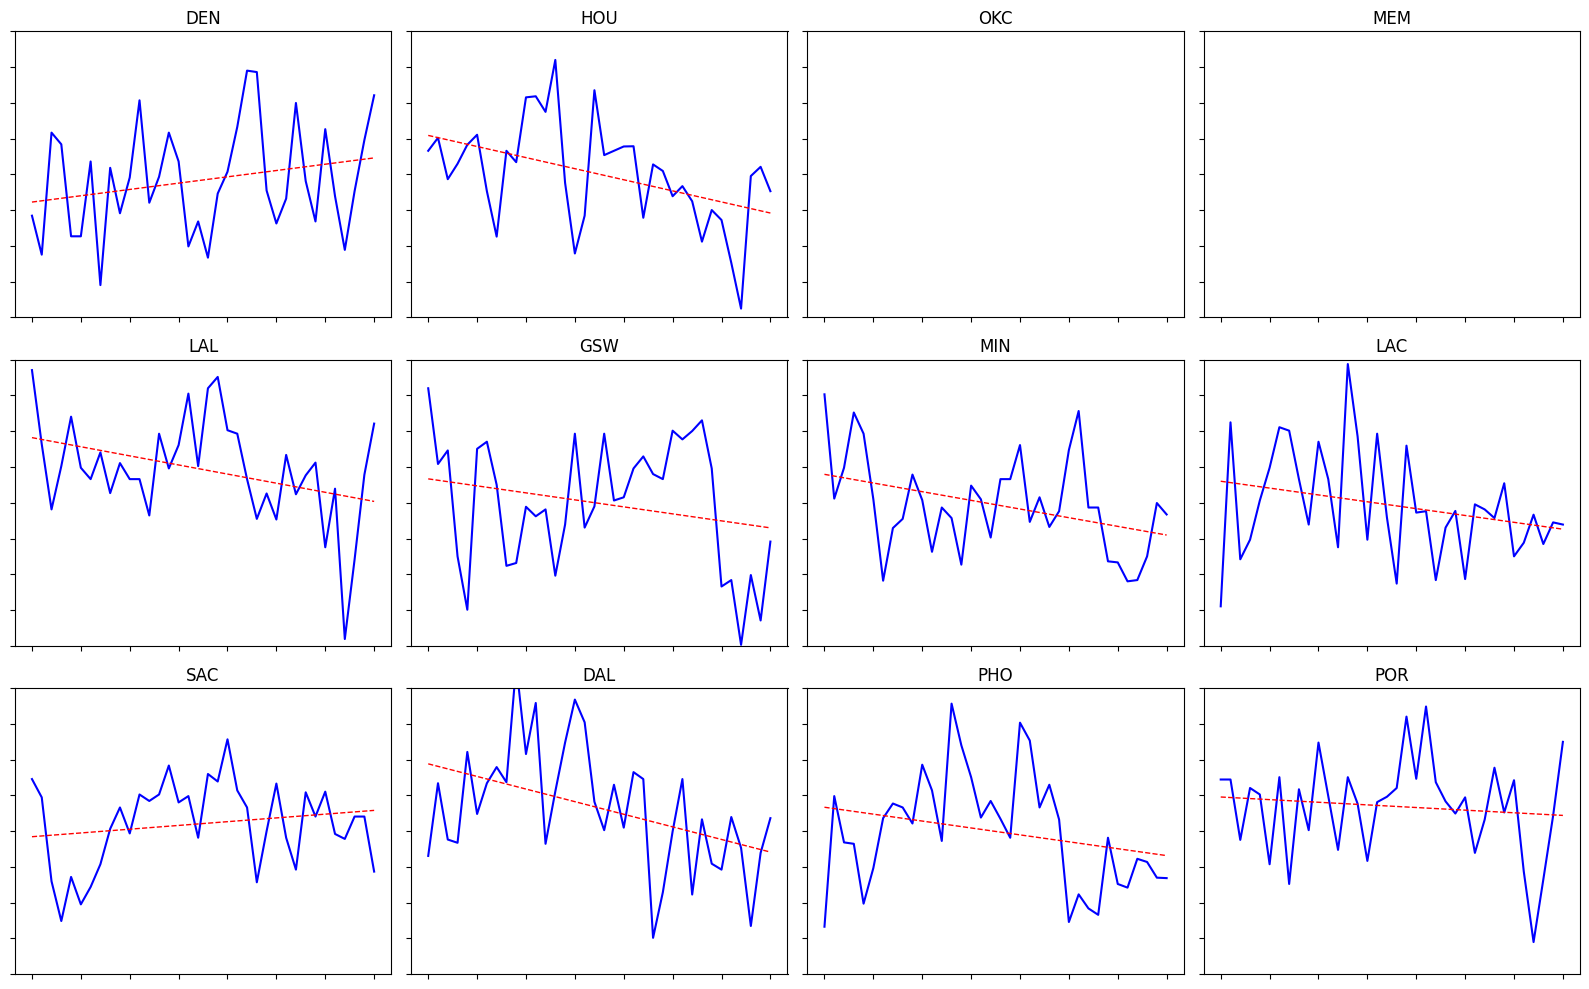

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 讀取資料
roster_path = "nba_rosters_full_data.csv"
df_roster = pd.read_csv(roster_path)

# 轉換資料型別
df_roster["year"] = pd.to_numeric(df_roster["year"], errors="coerce")
df_roster["avg_ht"] = pd.to_numeric(df_roster["avg_ht"], errors="coerce")

# 指定的 12 支球隊
selected_teams = [
    "DEN", "HOU", "OKC", "MEM",
    "LAL", "GSW", "MIN", "LAC",
    "SAC", "DAL", "PHO", "POR"
]

# 準備畫 3x4 小圖
fig, axes = plt.subplots(3, 4, figsize=(16, 10), sharex=True, sharey=True)
axes = axes.flatten()

for i, team in enumerate(selected_teams):
    team_data = df_roster[df_roster["team"] == team].dropna(subset=["year", "avg_ht"])
    axes[i].plot(team_data["year"], team_data["avg_ht"], color="blue")

    # 加入回歸線
    if len(team_data) > 1:
        z = np.polyfit(team_data["year"], team_data["avg_ht"], 1)
        p = np.poly1d(z)
        axes[i].plot(team_data["year"], p(team_data["year"]), color="red", linestyle="--", linewidth=1)
    
    axes[i].set_ylim(196, 204)
    axes[i].set_title(team)
    axes[i].tick_params(labelbottom=False, labelleft=False)
plt.tight_layout()
plt.show()


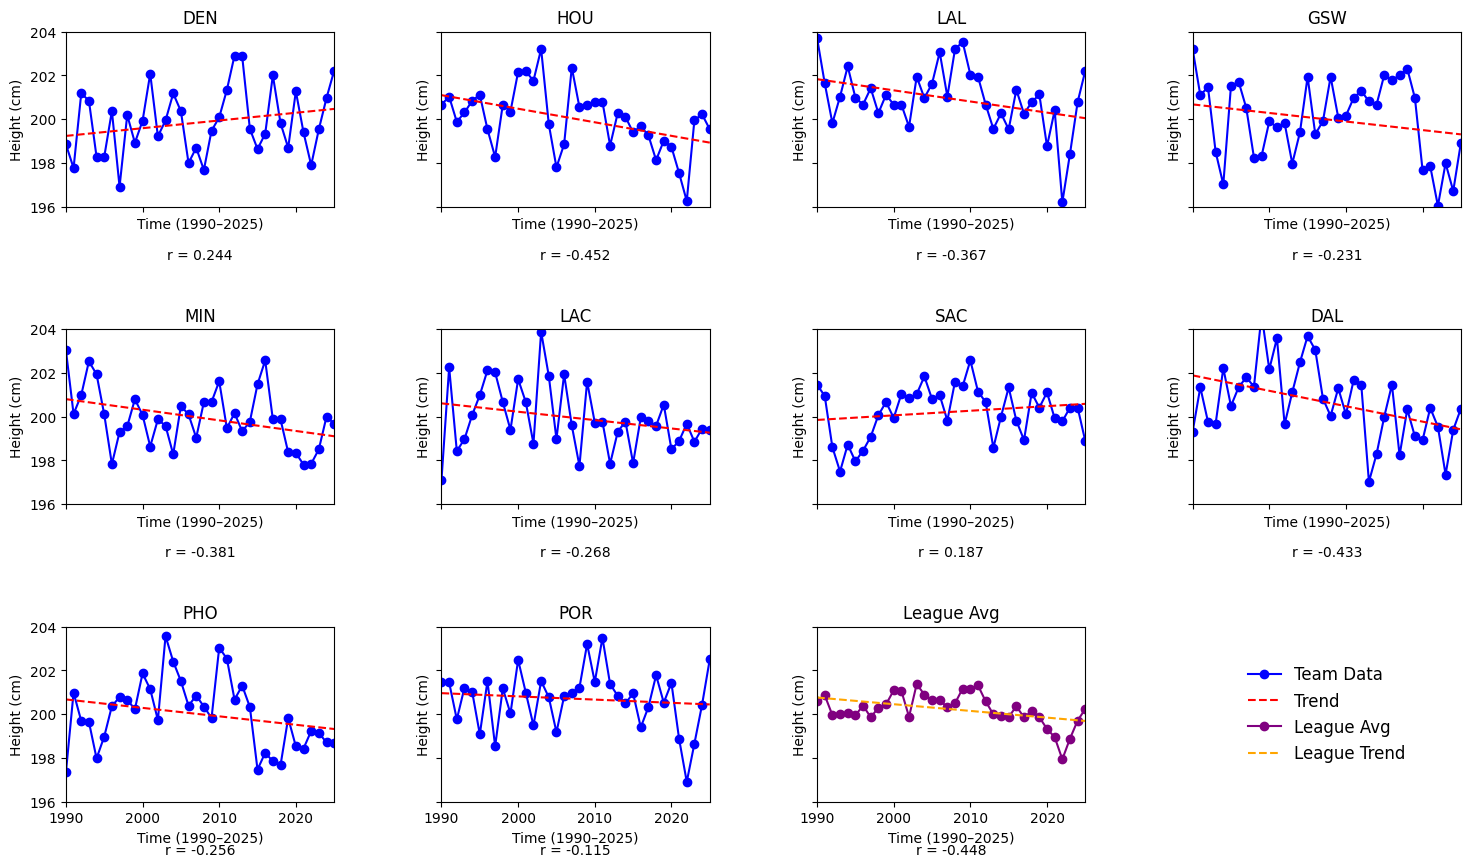

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D
from scipy.stats import linregress

# 讀取資料
roster_path = "nba_rosters_full_data.csv"
df_roster = pd.read_csv(roster_path)

# 資料前處理
df_roster["year"] = pd.to_numeric(df_roster["year"], errors="coerce")
df_roster["avg_ht"] = pd.to_numeric(df_roster["avg_ht"], errors="coerce")

# 排除 OKC、MEM，僅顯示 10 隊
display_teams = [
    "DEN", "HOU",
    "LAL", "GSW", "MIN", "LAC",
    "SAC", "DAL", "PHO", "POR"
]

years_range = np.arange(1990, 2026)

# 計算聯盟平均身高
league_avg_ht = (
    df_roster.dropna(subset=["year", "avg_ht"])
    .groupby("year")["avg_ht"]
    .mean()
    .reset_index()
)

# 建立 3x4 畫布
fig, axes = plt.subplots(3, 4, figsize=(18, 10), sharex=True, sharey=True)
axes = axes.flatten()

# 繪製每一隊
for i, team in enumerate(display_teams):
    ax = axes[i]
    team_data = df_roster[df_roster["team"] == team].dropna(subset=["year", "avg_ht"]).sort_values("year")
    full_data = pd.DataFrame({"year": years_range}).merge(team_data[["year", "avg_ht"]], on="year", how="left")

    ax.plot(full_data["year"], full_data["avg_ht"], color="blue", marker='o', linestyle='-', label="Team Data")

    valid = full_data.dropna(subset=["avg_ht"])
    if len(valid) > 1:
        slope, intercept, r, p, stderr = linregress(valid["year"], valid["avg_ht"])
        p_line = np.poly1d([slope, intercept])
        ax.plot(valid["year"], p_line(valid["year"]), color="red", linestyle="--", label="Trend")
        # 標示 r 值在下方
        ax.text(0.5, -0.3, f"r = {r:.3f}", transform=ax.transAxes, ha='center', fontsize=10)
    else:
        ax.text(0.5, -0.3, "r = N/A", transform=ax.transAxes, ha='center', fontsize=10)

    ax.set_title(team)
    ax.set_xlim(1990, 2025)
    ax.set_ylim(196, 204)
    ax.set_xlabel("Time (1990–2025)")
    ax.set_ylabel("Height (cm)")

# 第11格：League Avg
ax_league = axes[10]
ax_league.plot(league_avg_ht["year"], league_avg_ht["avg_ht"], color="purple", marker='o', linestyle='-', label="League Avg")
slope, intercept, r, p, stderr = linregress(league_avg_ht["year"], league_avg_ht["avg_ht"])
p_line = np.poly1d([slope, intercept])
ax_league.plot(league_avg_ht["year"], p_line(league_avg_ht["year"]), color="orange", linestyle="--", label="League Trend")
ax_league.set_title("League Avg")
ax_league.set_xlim(1990, 2025)
ax_league.set_ylim(196, 204)
ax_league.set_xlabel("Time (1990–2025)")
ax_league.set_ylabel("Height (cm)")
ax_league.text(0.5, -0.3, f"r = {r:.3f}", transform=ax_league.transAxes, ha='center', fontsize=10)

# 第12格：Legend
ax_legend = axes[11]
ax_legend.axis("off")
custom_lines = [
    Line2D([0], [0], color="blue", marker='o', linestyle='-', label="Team Data"),
    Line2D([0], [0], color="red", linestyle="--", label="Trend"),
    Line2D([0], [0], color="purple", marker='o', linestyle='-', label="League Avg"),
    Line2D([0], [0], color="orange", linestyle="--", label="League Trend")
]
ax_legend.legend(handles=custom_lines, loc='center', fontsize=12, frameon=False)

# 調整整體間距
fig.subplots_adjust(wspace=0.4, hspace=0.7)

plt.show()


/var/folders/nh/2tgqm8911dv2p52_zj1hxkjw0000gn/T/ipykernel_58652/2513451558.py:38: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.text(2, 0.6, f'y = {float(model.coef_[0]):.3f}x + {float(model.intercept_):.3f}', fontsize=12)


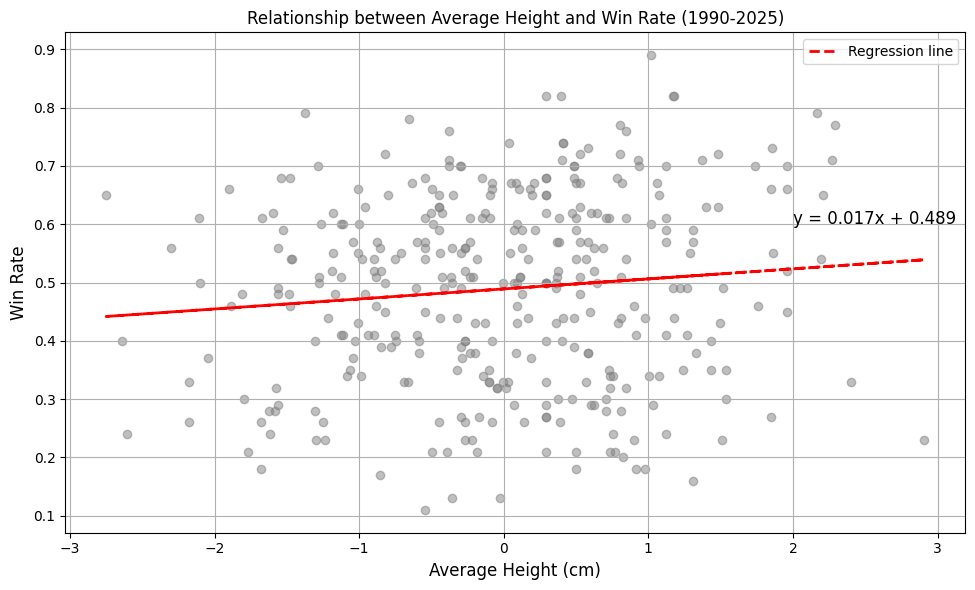

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 讀取資料
roster_path = "nba_rosters_full_data.csv"
winrate_path = "nba_winrates_normalized.csv"

df_roster = pd.read_csv(roster_path)
df_win = pd.read_csv(winrate_path)

# 轉換資料型別
df_roster["year"] = pd.to_numeric(df_roster["year"], errors="coerce")
df_roster["avg_ht"] = pd.to_numeric(df_roster["avg_ht"], errors="coerce")
df_roster["avg_ht"] = (df_roster['avg_ht'] - np.mean(df_roster['avg_ht']))/ np.std(df_roster['avg_ht'])
df_win["year"] = pd.to_numeric(df_win["year"], errors="coerce")
df_win["win_rate"] = pd.to_numeric(df_win["normalized_win_rate"], errors="coerce")

# 合併資料
df = pd.merge(df_roster, df_win, on=["team", "year"])

X = df[['avg_ht']]
y = df[['win_rate']]

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(df['avg_ht'], df['win_rate'], color='grey', alpha=0.5)
plt.plot(df['avg_ht'], y_pred, color='red', linestyle='--', linewidth=2, label='Regression line')
plt.title('Relationship between Average Height and Win Rate (1990-2025)', fontsize=12)
plt.xlabel('Average Height (cm)', fontsize=12)
plt.ylabel('Win Rate', fontsize=12)

plt.text(2, 0.6, f'y = {float(model.coef_[0]):.3f}x + {float(model.intercept_):.3f}', fontsize=12)

plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()